In [1]:
!pip install easyocr

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 47.8 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 MB 29.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.8/286.8 kB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 58.4 MB/s eta 0:00:00ta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 912.2/912.2 kB 44.3 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.9/422.9 kB 38.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 144.1 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: Pillow
    Found existing installation: pillow 11.1.0
    Uninstalling pillow-11.1.0:
      Successfully uninstalled pillow-11.1.0


In [2]:
!pip install git+https://github.com/JaidedAI/EasyOCR.git

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
  Cloning https://github.com/JaidedAI/EasyOCR.git to /tmp/pip-req-build-e4bdlxjq
  Running command git clone --filter=blob:none --quiet https://github.com/JaidedAI/EasyOCR.git /tmp/pip-req-build-e4bdlxjq
  Resolved https://github.com/JaidedAI/EasyOCR.git to commit c4f3cd7225efd4f85451bd8b4a7646ae9a092420
  Preparing metadata (setup.py) ... done


In [3]:
import easyocr
reader = easyocr.Reader(['en']) # this needs to run only once to load the model into memory
result = reader.readtext('/home/featurize/data/Images/resized/053191.jpg')

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [10]:
import numpy as np
import cv2

image_path = "/home/featurize/data/Images/Removed/1222527-26-265158.JPG"
image = cv2.imread(image_path)
mask = np.zeros(image.shape[:2], dtype=np.uint8)
output_path = "/home/featurize/data/Images/1222527-26-265158.JPG"
# 遍历检测结果并标注文本区域
for (coords, text, confidence) in result:
    # 获取文本区域的坐标
    top_left = tuple(map(int, coords[0]))  # 左上角
    bottom_right = tuple(map(int, coords[2]))  # 右下角
    
    # 在掩码上绘制矩形，将文本区域标记为白色
    cv2.rectangle(mask, top_left, bottom_right, 255, -1)  # -1 表示填充矩形

# 使用 Inpainting 修复图像
restored = cv2.inpaint(image, mask, inpaintRadius=3, flags=cv2.INPAINT_TELEA)

# 保存修复后的图像
cv2.imwrite(output_path, restored)

print(f"去除文本后的图像已保存至: {output_path}")


去除文本后的图像已保存至: /home/featurize/data/Images/1222527-26-265158.JPG


In [14]:
import os
import cv2
import numpy as np
import easyocr

# 初始化 EasyOCR
reader = easyocr.Reader(['en'])

# 输入和输出路径
input_folder = "/home/featurize/data/Images/resized"
output_folder = "/home/featurize/data/Images/Removed"

# 确保输出文件夹存在
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

def merge_text_boxes(results, mask_shape):
    """
    合并重叠的文本框并生成统一掩码。
    :param results: EasyOCR 检测结果
    :param mask_shape: 原图的尺寸 (height, width)
    :return: 合并后的掩码
    """
    mask = np.zeros(mask_shape, dtype=np.uint8)
    for (coords, text, confidence) in results:
        # 转换坐标为整数
        poly = np.array(coords, dtype=np.int32)
        # 在掩码上填充多边形区域
        cv2.fillPoly(mask, [poly], 255)
    return mask

def remove_text_from_image(input_path, output_path):
    """
    从图像中移除文本并保存修复后的图像。
    :param input_path: 输入图像路径
    :param output_path: 输出图像路径
    """
    # 读取图像
    image = cv2.imread(input_path)
    if image is None:
        print(f"⚠️ 无法读取图像: {input_path}")
        return
    
    # 使用 EasyOCR 检测文本
    results = reader.readtext(input_path)

    # 生成合并后的掩码
    mask = merge_text_boxes(results, image.shape[:2])

    # 使用 Inpainting 修复文本区域
    restored = cv2.inpaint(image, mask, inpaintRadius=5, flags=cv2.INPAINT_TELEA)

    # 保存修复后的图像
    cv2.imwrite(output_path, restored)
    print(f"✅ 已处理: {output_path}")

# 批量处理所有图像
for file_name in os.listdir(input_folder):
    if file_name.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp')):
        input_path = os.path.join(input_folder, file_name)
        output_path = os.path.join(output_folder, file_name)
        remove_text_from_image(input_path, output_path)

print("🎉 所有图像处理完成！")



✅ 已处理: /home/featurize/data/Images/Removed/244442.jpg
✅ 已处理: /home/featurize/data/Images/Removed/243357 (2).jpg
✅ 已处理: /home/featurize/data/Images/Removed/237873.jpg
✅ 已处理: /home/featurize/data/Images/Removed/283258.jpg
✅ 已处理: /home/featurize/data/Images/Removed/236796.jpg
✅ 已处理: /home/featurize/data/Images/Removed/277179.jpg
✅ 已处理: /home/featurize/data/Images/Removed/226482.jpg
✅ 已处理: /home/featurize/data/Images/Removed/231899.jpg
✅ 已处理: /home/featurize/data/Images/Removed/171985.jpg
✅ 已处理: /home/featurize/data/Images/Removed/255331.jpg
✅ 已处理: /home/featurize/data/Images/Removed/198081.jpg
✅ 已处理: /home/featurize/data/Images/Removed/240942.jpg
✅ 已处理: /home/featurize/data/Images/Removed/270792.jpg
✅ 已处理: /home/featurize/data/Images/Removed/348164.jpg
✅ 已处理: /home/featurize/data/Images/Removed/273241.jpg
✅ 已处理: /home/featurize/data/Images/Removed/204094.jpg
✅ 已处理: /home/featurize/data/Images/Removed/186217.jpg
✅ 已处理: /home/featurize/data/Images/Removed/251469.jpg
✅ 已处理: /home/featurize/d

In [15]:
import pandas as pd

# 读取原始 CSV 文件
file_path = "/home/featurize/data/captions.csv"
df = pd.read_csv(file_path)

# 确保列名为 'path'，替换 'resized' 为 'Removed'
if 'path' in df.columns:
    df['path'] = df['path'].str.replace('resized', 'Removed', regex=False)
else:
    raise KeyError("The 'path' column is not found in the CSV file.")

# 保存修改后的文件为 captions_removed.csv
output_path = "/home/featurize/data/captions_removed.csv"
df.to_csv(output_path, index=False)

print(f"Modified CSV saved to {output_path}")


Modified CSV saved to /home/featurize/data/captions_removed.csv


In [25]:
!pip install python-doctr


Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 304.1/304.1 kB 4.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 51.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 214.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 71.9 MB/s eta 0:00:00ta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 171.7 MB/s eta 0:00:00
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993225 sha256=cf6141a05c011678bf10fe83343110eb7845ed36a88d191baca5423b3c18fd4c
  Stored in directory: /home/featurize/.cache/pip/wheels/ee/e9/63/fe12d571f8675325c5e131236f64a52b7ed05da124bd628a74
Successfully built langdetect


In [26]:
import torch
print(torch.__version__)


2.6.0+cu124


In [5]:
from doctr.io import DocumentFile
from doctr.models import ocr_predictor
import matplotlib.pyplot as plt


In [11]:
# 选择文本检测和识别模型
model = ocr_predictor(det_arch='db_resnet50', reco_arch='crnn_vgg16_bn', pretrained=True)
# 读取图像
image_path = "/home/featurize/data/Images/resized/1222527-26-265158.JPG"
doc = DocumentFile.from_images(image_path)





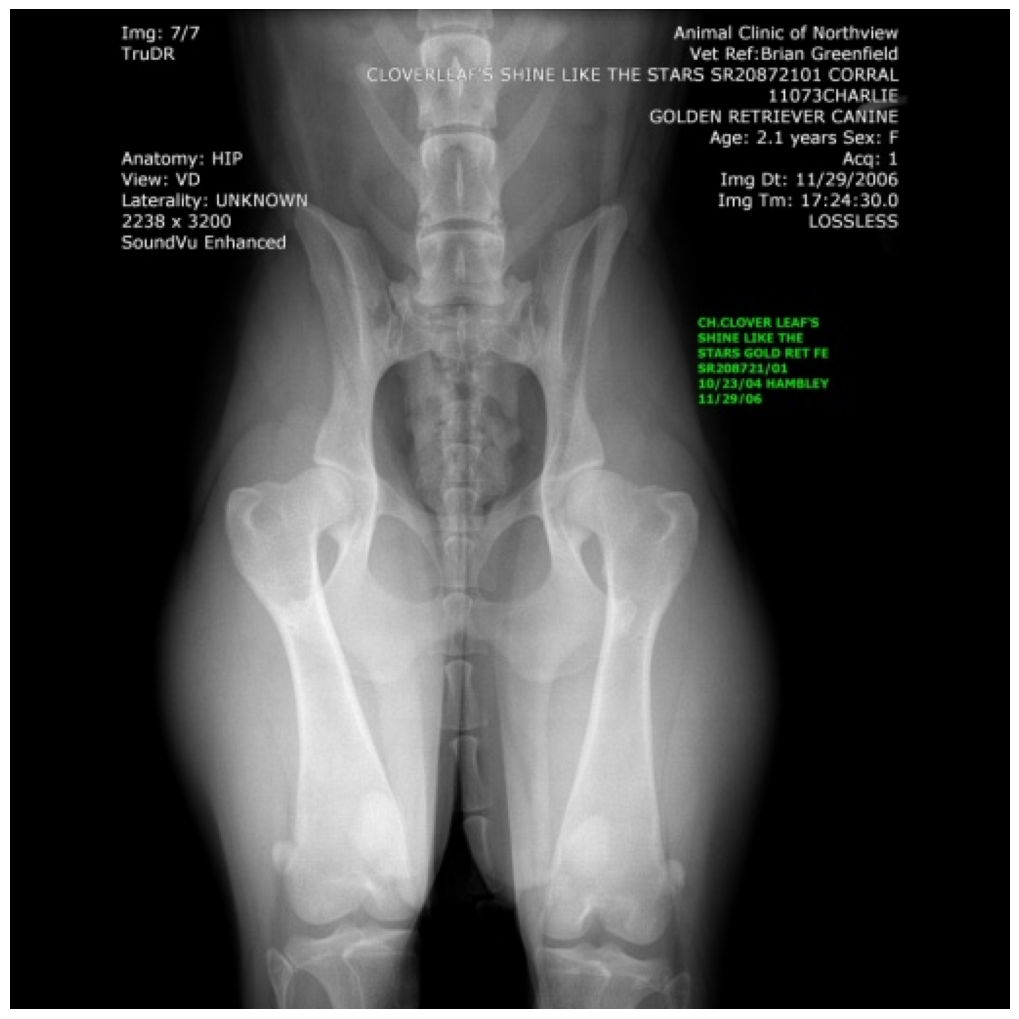

In [12]:
# 进行 OCR 预测（检测+识别）
result = model(doc)

# 显示检测结果（如果安装了 matplotlib 和 mplcursors）
result.show()


In [13]:
result

Document(
  (pages): [Page(
    dimensions=(512, 512)
    (blocks): []
  )]
)